In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Chemometrics.basic import pload
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)

In [4]:
eic = pload('EIC.p')

In [6]:
def get_rtrange(eic):
    # 获取单峰EIC图谱的保留时间范围
    mavg = eic.intensity.rolling(20).mean()
    ints = eic.intensity.sort_values(ascending=False)
    for i in ints:
        ngrp = (mavg>i).diff().sum()
        if ngrp > 2.5:
            break
        threshold = i+1
    rt_range = eic.loc[mavg>threshold].rt
    return rt_range.min(),rt_range.max(),threshold

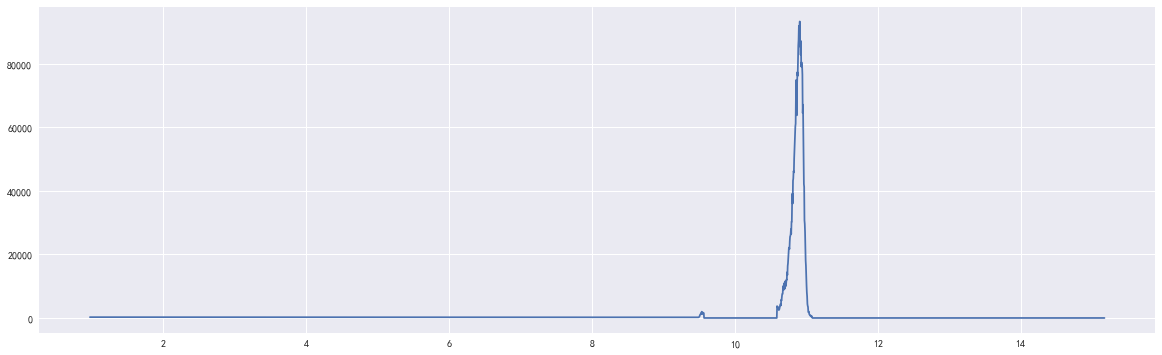

In [7]:
mavg = eic.intensity.rolling(20).mean()
eic.loc[mavg<get_rtrange(eic)[-1],'intensity']=0
plt.plot(eic.rt,eic.intensity)